# Problema del agente viajero (TSP) y reinforcement learning

## Integrantes: 
- Samuel Alonso 
- Daniel Bruno
- Gianfranco Lanza
- Sandro Portanova
- Carlos Fornari
- Alejandro Molina
- Jose Perez

### Librerias

In [1]:
from keras.models import Sequential
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.layers import Dense

random.seed(123)

### Creación del conjunto de datos

In [2]:
# Se crea una lista de puntos
Points = []
points_position = []

# Se define la cantidad de ciudades que se van a generar
cities_count = 50

# Se generan x puntos aleatorios en r2 que representan ciudades
for i in range(0,cities_count):
  x= 10 * random.random()
  y= 5  * random.random()
  Points.append([x,y,"Punto "+str(i)])
  points_position.append([x,y])

# Mostramos los puntos generados
print(Points)

[[0.5236359885094433, 0.4359333876131616, 'Punto 0'], [4.0724176367039835, 0.5385011746921953, 'Punto 1'], [9.011988779516946, 0.19076833051161202, 'Punto 2'], [5.362020400339269, 1.660988492548399, 'Punto 3'], [8.520866189293686, 0.7983119836098496, 'Punto 4'], [3.3721665710927553, 1.6689819731447764, 'Punto 5'], [2.451633525176111, 0.008352767896114277, 'Punto 6'], [4.362757934152183, 0.43806749875211437, 'Punto 7'], [5.975994644879905, 0.34938480729591215, 'Punto 8'], [3.154589737358633, 2.2416085415347187, 'Punto 9'], [9.053986522844989, 0.46382280689247546, 'Punto 10'], [1.4217506443150107, 3.9503592217940082, 'Punto 11'], [0.21235974816989245, 4.555752740451603, 'Punto 12'], [5.734080856809271, 1.3266085263078164, 'Punto 13'], [8.378376441951344, 3.8439737373999177, 'Punto 14'], [3.4346215815596457, 4.007482956460165, 'Punto 15'], [2.0686247066611143, 3.0445126309527666, 'Punto 16'], [5.270749521614166, 4.046692623219024, 'Punto 17'], [3.152631522159881, 1.991190757339496, 'Punto

### Graficamos los puntos

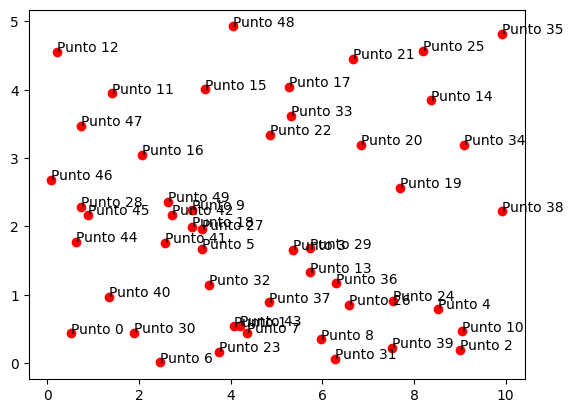

In [3]:
# Graficamos los puntos generados con sus respectivos nombres
for i in range(0,cities_count):
  plt.plot(Points[i][0],Points[i][1], 'ro')
  plt.text(Points[i][0],Points[i][1],Points[i][2])


### Creacion y llenado de la matriz reward.
Para llenar la matriz Reward hemos decidido usar 
- R = - $d_{ij}^2$


In [4]:
# Ecuación de distancia entre 2 puntos
def distance(x1,x2,y1,y2):
  return np.sqrt((x1-x2)**2 + (y1-y2)**2)
         
# Se crea la matriz Reward
Reward = [ [ 0 for columna in range(0,len(Points))] for fila in range (0,len(Points))]

# Se llena la matriz Reward con la distancia entre los puntos al cuadrado, negativa
for i in range(0,len(Points)):
  for j in range(0,len(Points)):
    Reward[i][j] = -(distance(Points[i][0],Points[j][0],Points[i][1],Points[j][1]))**2

### Creación y llenado de la matriz Q.
Para llenar la matriz Q hemos decidido usar
- Formula: Q(estado, accion) = R(estado, accion)+γ Max[Q(siguienteEstado, todasAccionessiguienteEstado]


    

In [5]:
# Se crea la matriz Q:
Qmatrix = [ [ 0 for columna in range(0,len(Points))] for fila in range (0,len(Points))]

In [6]:
# Se llena la matriz Q:

# Se inicializan el valor del learning rate
learningRate = 0.01

# La ecuacion de Q-learning:
def QLearning(state,next_state):
  # Se crea una lista de los valores de Q desde el punto siguiente
  nextQ = []

  # Se colocan en la lista los valores de Q desde el punto siguiente, para luego elegir el máximo
  for i in range(0,len(Points)):
    if Points[i][2] not in visitedPoints:
      nextQ.append(Qmatrix[next_state][i])

  # Se va llena la matriz Q con la ecuación de Q-learning.
  if (nextQ != []):
    Qmatrix[state][next_state] = Reward[state][next_state] + learningRate * max(nextQ)
  else:
    Qmatrix[state][next_state] = Reward[state][next_state]


# Se llena la matriz Q escogiendo rutas aleatorias entre los puntos
for i in range(0,5000):
  # Se crea una lista de los puntos visitados
  visitedPoints = []

  # Se escoge un punto aleatorio para empezar
  state = random.randrange(0,len(Points),1)

  # Se agrega el punto a la lista de visitados
  visitedPoints.append(Points[state][2])

  while (len(visitedPoints) != len(Points)):
    # Se escoge un punto aleatorio para ir
    randomNext = random.randrange(0,len(Points),1)
    if Points[randomNext][2] not in visitedPoints:
      # Se agrega el punto a la lista de visitados si no ha sido visitado
      visitedPoints.append(Points[randomNext][2])

      # Se llama a la función QLearning para llenar la matriz Q
      QLearning(state, randomNext)

      # Se actualiza el estado
      state = randomNext

### Se hace el algoritmo de reinforcement learning, escogiendo los mayores valores de Q

In [7]:
# Se crea una lista de los puntos visitados
visitedPoints = []

# Se escoge un punto aleatorio para empezar
state = 0

# Se agrega el punto a la lista de visitados y se inicializa la distancia total en 0
total_distance = 0
visitedPoints.append(Points[state][2])

# Se va escogiendo la ruta mas corta, yendo siempre al punto que tenga el valor de Q más bajo, y que no se haya visitado antes
while (len(visitedPoints) != len(Points)):
  possible_next = []
  for i in range(0,len(Points)):
    if Points[i][2] not in visitedPoints:
      possible_next.append(i)
  
  max_reward = -1

  for i in range(0,len(possible_next)):
    if (max_reward == -1) or (Qmatrix[state][possible_next[i]] > Qmatrix[state][max_reward]):
      max_reward = possible_next[i]

  # Se agrega la distancia entre el punto anterior y al que se movio a la distancia total
  total_distance += distance(Points[state][0],Points[max_reward][0],Points[state][1],Points[max_reward][1])

  # Se agrega el punto a los puntos visitados
  visitedPoints.append (Points[max_reward][2])
  state = max_reward

# Mostramos la ruta mas corta
print (visitedPoints)

# Mostramos la distancia total
print ('La distancia total fue de: ' + str(total_distance))

['Punto 0', 'Punto 40', 'Punto 30', 'Punto 6', 'Punto 23', 'Punto 1', 'Punto 43', 'Punto 7', 'Punto 37', 'Punto 3', 'Punto 29', 'Punto 13', 'Punto 36', 'Punto 26', 'Punto 8', 'Punto 31', 'Punto 39', 'Punto 24', 'Punto 4', 'Punto 10', 'Punto 2', 'Punto 38', 'Punto 34', 'Punto 14', 'Punto 25', 'Punto 21', 'Punto 20', 'Punto 19', 'Punto 33', 'Punto 17', 'Punto 22', 'Punto 15', 'Punto 48', 'Punto 16', 'Punto 49', 'Punto 42', 'Punto 9', 'Punto 27', 'Punto 5', 'Punto 18', 'Punto 41', 'Punto 32', 'Punto 45', 'Punto 28', 'Punto 44', 'Punto 46', 'Punto 47', 'Punto 11', 'Punto 12', 'Punto 35']
La distancia total fue de: 53.08946232381465


## Ahora realizamos el algoritmo de reinforcement learning con redes neuronales.
Para ello reemplazaremos la matriz Q por una red neuronal.


### Creamos una red feed forward para emular a la matriz Q.

In [8]:
model = Sequential()
# Hay que optimizar la cantidad de neuronas, capas, y capaz las funciones de activacionpara bajar mas el loss cuando hay muchos puntos
model.add(Dense(1000, input_dim=2, activation='relu'))
model.add(Dense(cities_count, activation='linear'))

# Compile the model
# Se usan los optimizadores y metricas de la regresion linear
model.compile(loss='mean_squared_error', optimizer='adam')

# Se pasan los puntos y la matriz Q para entrenar a la red
H = model.fit(points_position, Qmatrix,
    epochs=450, batch_size=1,)



Epoch 1/450

50/50 [==============================] - 3s 4ms/step - loss: 655.0093
Epoch 2/450
50/50 [==============================] - 0s 3ms/step - loss: 419.5995
Epoch 3/450
50/50 [==============================] - 0s 5ms/step - loss: 337.2719
Epoch 4/450
50/50 [==============================] - 0s 3ms/step - loss: 311.2621
Epoch 5/450
50/50 [==============================] - 0s 8ms/step - loss: 277.7921
Epoch 6/450
50/50 [==============================] - 0s 4ms/step - loss: 250.4884
Epoch 7/450
50/50 [==============================] - 0s 5ms/step - loss: 230.2542
Epoch 8/450
50/50 [==============================] - 0s 7ms/step - loss: 210.5980
Epoch 9/450
50/50 [==============================] - 0s 5ms/step - loss: 194.3060
Epoch 10/450
50/50 [==============================] - 0s 4ms/step - loss: 182.4733
Epoch 11/450
50/50 [==============================] - 0s 3ms/step - loss: 171.2240
Epoch 12/450
50/50 [==============================] - 0s 3ms/step - loss: 162.9682
Epoch 13/4

### Se busca el valor mas bajo de los resultados de la red neural para encontrar el camino más corto

In [9]:
# Se crea una lista de los puntos visitados
visitedPoints = []

# Se escoge un punto aleatorio para empezar
state = 0

# Se agrega el punto a la lista de visitados y se inicializa la distancia total en 0
total_distance = 0
visitedPoints.append(Points[state][2])

# Aqui realizaremos el mismo proceso que con Q, pero ahora la red nos da todos los valores de Q para ese punto, 
# y simplemente se agarra el mayor y se va a ese punto (si no ha sido visitado)
while (len(visitedPoints) != len(Points)):
  
  # Se crea una lista de los puntos a visitar
  possible_options = model.predict([[Points[state][0],Points[state][1]]])

  max_reward=-1
  for i in range(0,len(Points)):
    if Points[i][2] not in visitedPoints:
      if (max_reward == -1) or (possible_options[0][i]>possible_options[0][max_reward]):
        max_reward = i

  # Se agrega la distancia entre el punto anterior y al que se movio a la distancia total
  total_distance += distance(Points[state][0],Points[max_reward][0],Points[state][1],Points[max_reward][1])

  # Se agrega el punto a los puntos visitados
  visitedPoints.append (Points[max_reward][2])

  # Se actualiza el estado
  state = max_reward

1/1 [==============================] - 0s 95ms/step


### Mostramos los resultados

In [10]:
print (visitedPoints)
print ('La distancia total fue de: ' + str(total_distance))

['Punto 0', 'Punto 40', 'Punto 30', 'Punto 6', 'Punto 23', 'Punto 1', 'Punto 43', 'Punto 7', 'Punto 37', 'Punto 3', 'Punto 29', 'Punto 13', 'Punto 36', 'Punto 26', 'Punto 8', 'Punto 31', 'Punto 39', 'Punto 24', 'Punto 4', 'Punto 10', 'Punto 2', 'Punto 38', 'Punto 34', 'Punto 14', 'Punto 25', 'Punto 21', 'Punto 20', 'Punto 19', 'Punto 33', 'Punto 17', 'Punto 22', 'Punto 15', 'Punto 48', 'Punto 16', 'Punto 49', 'Punto 42', 'Punto 9', 'Punto 18', 'Punto 27', 'Punto 5', 'Punto 32', 'Punto 41', 'Punto 45', 'Punto 28', 'Punto 44', 'Punto 46', 'Punto 47', 'Punto 11', 'Punto 12', 'Punto 35']
La distancia total fue de: 51.62502853287503
